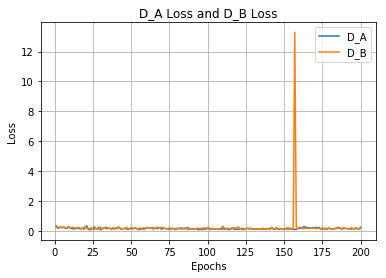

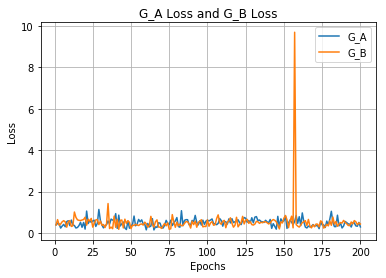

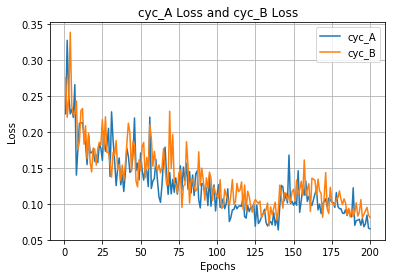

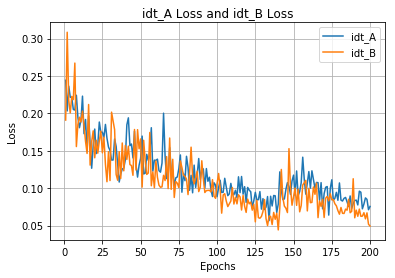

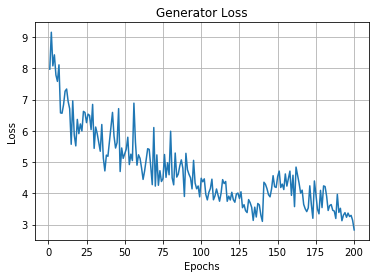

[0.24420000000000003, 0.2032, 0.2364, 0.22160000000000002, 0.221, 0.2052, 0.2044, 0.2242, 0.1944, 0.18080000000000002, 0.1906, 0.223, 0.1728, 0.1918, 0.1494, 0.1968, 0.1588, 0.1266, 0.157, 0.179, 0.1462, 0.15760000000000002, 0.18839999999999998, 0.1746, 0.1748, 0.1682, 0.1852, 0.1668, 0.155, 0.1504, 0.1376, 0.1376, 0.1658, 0.1558, 0.1318, 0.1082, 0.119, 0.1256, 0.1268, 0.13799999999999998, 0.18460000000000001, 0.194, 0.1568, 0.159, 0.1404, 0.1762, 0.131, 0.11479999999999999, 0.1306, 0.13979999999999998, 0.1696, 0.119, 0.12, 0.1452, 0.13720000000000002, 0.1474, 0.18080000000000002, 0.12279999999999999, 0.13740000000000002, 0.13720000000000002, 0.13879999999999998, 0.1234, 0.1214, 0.1336, 0.2002, 0.1432, 0.11279999999999998, 0.11679999999999999, 0.1542, 0.1242, 0.124, 0.1036, 0.11379999999999998, 0.11499999999999999, 0.1262, 0.1444, 0.09459999999999999, 0.11979999999999999, 0.11000000000000001, 0.1426, 0.1278, 0.0972, 0.1172, 0.0938, 0.1308, 0.101, 0.118, 0.1396, 0.1116, 0.1252, 0.1258, 

In [17]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

epochs, G, D_A, D_B, G_A, G_B, cyc_A, cyc_B, idt_A, idt_B = [], [], [], [], [], [], [], [], [], []
#print(sys.path)

f = open('./checkpoints/photo2ukiyoe_kaiming_dropout/loss_log.txt', 'r')
Line = f.readline()
ep = 0
while Line:
    line = Line.strip().split(' ')
    if len(line) < 24:
        Line = f.readline()
        continue
    ep += 1
    epochs.append(ep)
    D_A.append(float(line[9]))
    D_B.append(float(line[17]))
    G_A.append(float(line[11]))
    G_B.append(float(line[19]))
    cyc_A.append(float(line[13]))
    cyc_B.append(float(line[21]))
    idt_A.append(float(line[15]))
    idt_B.append(float(line[23]))
    G.append(float(line[11])+float(line[13])+float(line[15])+float(line[19])+float(line[21])+float(line[23]))
    Line = f.readline()

#print(G, D_A, D_B, epochs)
for i in range(ep):
    cyc_A[i] /= 10
    cyc_B[i] /= 10
    idt_A[i] /= 5
    idt_B[i] /= 5

G[-38] = (G[-37]+G[-39])/2
D_B[-44] = (D_B[-45] + D_B[-43])/2   
G_B[-44] = (G_B[-45] + G_B[-43])/2   
cyc_A[-38] = (cyc_A[-37] + cyc_A[-39])/2   
cyc_B[-38] = (cyc_B[-37] + cyc_B[-39])/2   
idt_A[-38] = (idt_A[-37] + idt_A[-39])/2   
G[-44] = (G[-45] + G[-43])/2    

plt.plot(epochs, D_A, label='D_A')
plt.plot(epochs, D_B, label='D_B')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('D_A Loss and D_B Loss')
plt.show()

plt.plot(epochs, G_A, label='G_A')
plt.plot(epochs, G_B, label='G_B')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('G_A Loss and G_B Loss')
plt.show()

plt.plot(epochs, cyc_A, label='cyc_A')
plt.plot(epochs, cyc_B, label='cyc_B')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('cyc_A Loss and cyc_B Loss')
plt.show()

plt.plot(epochs, idt_A, label='idt_A')
plt.plot(epochs, idt_B, label='idt_B')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('idt_A Loss and idt_B Loss')
plt.show()

plt.plot(epochs, G)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.title('Generator Loss')
plt.show()

print(idt_A)